In [1]:
import numpy as np
from iminuit import Minuit


In [2]:
import matplotlib.pylab as plt
data1 = np.random.normal(loc=20,scale=1, size=1000) # 1st gaussian
data2 = 30*np.random.random(size=1000) # uniform bkg
data3 = np.random.normal(loc=10, scale=10, size=1000) # 2nd gaussian

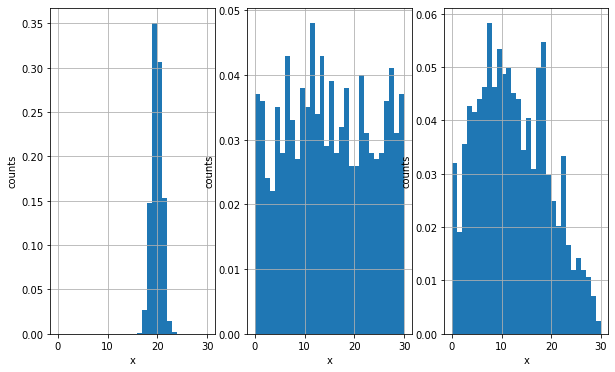

In [3]:
fig, axes = plt.subplots(1,3, figsize=(10,6))
axes[0].grid()
signalPDF, bins, patch = axes[0].hist(data1, bins = 30, range=(0,30), density=True)
axes[0].set_xlabel("x")
axes[0].set_ylabel("counts")

bkgPDF, bins, patch = axes[1].hist(data2, bins = 30, range=(0,30), density=True)
axes[1].grid()
axes[1].set_xlabel("x")
axes[1].set_ylabel("counts")

bkgPDF2, bins, patch = axes[2].hist(data3, bins = 30, range=(0,30), density=True)
axes[2].grid()
axes[2].set_xlabel("x")
axes[2].set_ylabel("counts")

plt.show()
ntotal = 1000
nsig = 0.3 #signal
n1 =  0.4 #First background component.
#third is n2 = 1 - nsig - n1

data = ntotal * (nsig * signalPDF + (1 - nsig) * ( (n1* bkgPDF + (1 - n1)* bkgPDF2)))

[ 23.82793349  18.06099762  21.68437055  24.11724466  27.2584323
  26.29605701  31.49368171  33.68180523  27.01368171  33.08655582
  30.25130641  34.39011876  28.47486936  30.49605701  22.58555819
  27.87961995  21.10912114  38.01011876  77.68536817 124.75030879
 109.55505938  65.57980998  26.84674584  15.42337292  12.54812352
  13.82574822  15.06812352  15.96931116  11.67287411  11.3576247 ]


Text(0, 0.5, 'density')

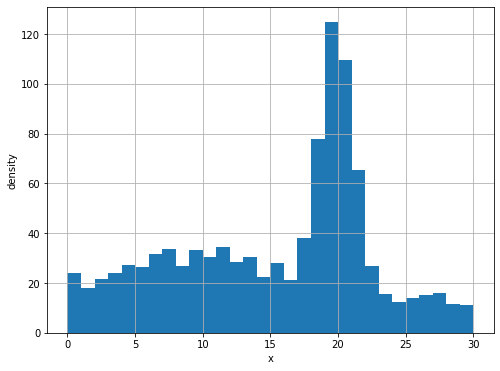

In [4]:
bin_width = np.diff(bins)[0]
bin_centers = bins[:-1] + bin_width/2.

print (data)
fig, ax = plt.subplots(figsize=(8,6))
ax.grid()
ax.bar(bin_centers, data,width=bin_width)
ax.set_xlabel("x")
ax.set_ylabel("density")

In [5]:
from pdf.pdf import PdfBase, Model
from pdf.parameter import Parameter

In [6]:
#from pdf.pdf import PdfBase

SignalPDF = PdfBase(signalPDF, name="SignalPDF")
AtmosPDF = PdfBase(bkgPDF, name="AtmosPDF")
CorsikaPDF = PdfBase(bkgPDF2, name="CorsikaPDF")

sigfrac = Parameter(value=0.3, limits=(0,1), fixed=False, name="sigfrac")
sigatmos_frac = Parameter(value=0.4, limits=(0,1), fixed=False, name="atmosfrac")


data = ntotal * (nsig * signalPDF + (1 - nsig) * ( (n1* bkgPDF + (1 - n1)* bkgPDF2)))

model = sigfrac * SignalPDF  + (sigatmos_frac * AtmosPDF + CorsikaPDF - sigatmos_frac * CorsikaPDF) - sigfrac * (sigatmos_frac * AtmosPDF) -  sigfrac * CorsikaPDF + sigfrac * (sigatmos_frac * CorsikaPDF)  

#model = sigfrac * (sigatmos_frac * AtmosPDF)

Parameter atmosfrac already exists in the model!
PDF AtmosPDF already exists in the model!
Parameter atmosfrac already exists in the model!
Parameter sigfrac already exists in the model!
PDF CorsikaPDF already exists in the model!
Parameter sigfrac already exists in the model!
PDF CorsikaPDF already exists in the model!
Parameter atmosfrac already exists in the model!
Parameter sigfrac already exists in the model!


In [7]:
print (model.expression)
print (model._pdfs.keys())
print (model._parameters.keys())

type(model._parameters["sigfrac"])

self._parameters['sigfrac'].value*self._pdfs['SignalPDF'][index] + self._parameters['atmosfrac'].value*self._pdfs['AtmosPDF'][index] + self._pdfs['CorsikaPDF'][index] - self._parameters['atmosfrac'].value*self._pdfs['CorsikaPDF'][index] - self._parameters['sigfrac'].value * self._parameters['atmosfrac'].value*self._pdfs['AtmosPDF'][index] - self._parameters['sigfrac'].value*self._pdfs['CorsikaPDF'][index] + self._parameters['sigfrac'].value * self._parameters['atmosfrac'].value*self._pdfs['CorsikaPDF'][index]
odict_keys(['SignalPDF', 'AtmosPDF', 'CorsikaPDF'])
odict_keys(['sigfrac', 'atmosfrac'])


pdf.parameter.Parameter

Text(0, 0.5, 'density')

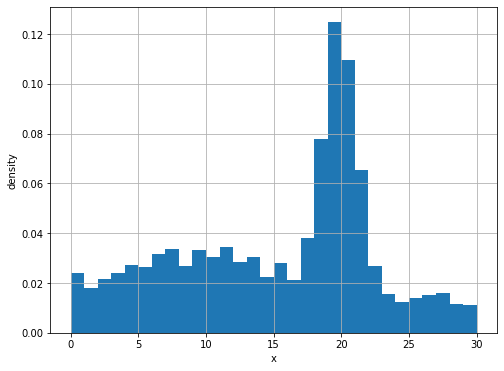

In [8]:
fig, ax = plt.subplots(figsize=(8,6))
ax.grid()
ax.bar(bin_centers, model, width=bin_width)
ax.set_xlabel("x")
ax.set_ylabel("density")

In [27]:
def LLH(pars):
    model._parameters["sigfrac"].value = pars[0]
    model._parameters["atmosfrac"].value = pars[1]
    
    values = [d * np.log(ntotal*model[i])-ntotal*model[i] for i, d in enumerate(data)]
      
    return -np.sum(values)

In [28]:
type(model._parameters["sigfrac"])

pdf.parameter.Parameter

In [29]:
evaluateLLH([0.1, 0.2])

-2655.6774565478077

In [30]:
kwds = dict()
kwds['errordef']=.5
kwds['print_level'] = 2.
#print list(model._parameters.keys())
names = list(model._parameters.keys())
print (names)
limits =([par.limits for par in list(model._parameters.values())])

print (limits)

['sigfrac', 'atmosfrac']
[array([0, 1]), array([0, 1])]


In [31]:
m = Minuit.from_array_func(LLH, (0., 0.) , limit=limits, name=names, **kwds)
m.migrad()

┌──────────────────────────────────┬──────────────────────────────────────┐
│ FCN = -2739                      │        Ncalls = 57 (57 total)        │
│ EDM = 2.8e-08 (Goal: 0.0001)     │               up = 0.5               │
├───────────────┬──────────────────┼──────────────────────────────────────┤
│ Valid Minimum │ Valid Parameters │        No Parameters at limit        │
├───────────────┴──────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│   Hesse ok    │  Has Covariance  │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘


┌──────────────────────────────────┬──────────────────────────────────────┐
│ FCN = -2739                      │        Ncalls = 57 (57 total)        │
│ EDM = 2.8e-08 (Goal: 0.0001)     │               up = 0.5               │
├───────────────┬──────────────────┼──────────────────────────────────────┤
│ Valid Minimum │ Valid Parameters │        No Parameters at limit        │
├───────────────┴──────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│   Hesse ok    │  Has Covariance  │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬───────────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name      │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ sigfrac   │   0.300   │   0.018   │            │            │    0    │    1    │       │
│ 1 │ atmosfrac │   0.40    │   0.07    │            │            │    0    │    1    │       │
└───┴───────────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘

In [51]:
m